# Transformée de Fourier 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Sinusoïde Fenêtrée

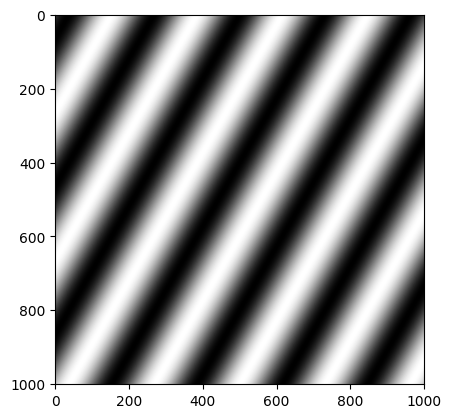

In [20]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x) 
period = 200
angle = np.pi/6
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / period
)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

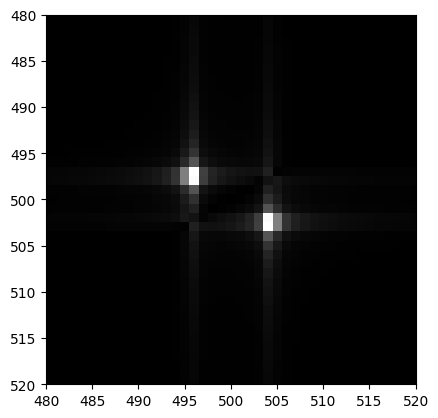

In [21]:
ft = np.fft.fftshift(grating) 
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.imshow(abs(ft))
plt.xlim([480, 520]) 
plt.ylim([520, 480]) 
plt.show()

### 1.1 Transformée de Fourier Inverse 2D

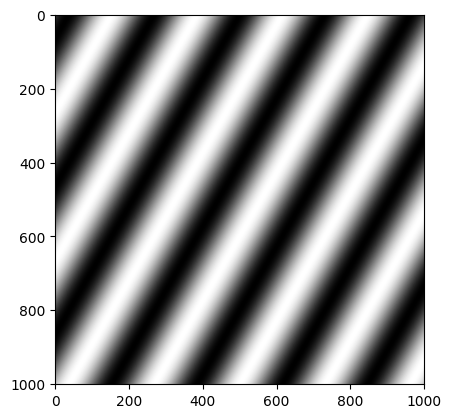

In [22]:
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)
plt.show()

## 2. Fente (1)

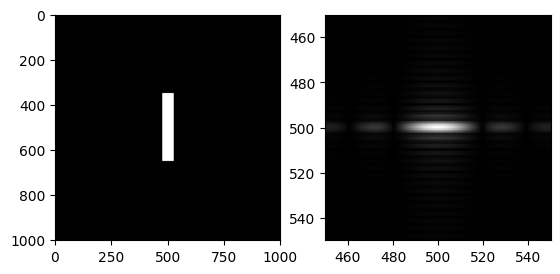

In [23]:
a = 50
b = 300 

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

grating = np.zeros_like(X)
mask = (np.abs(X) <= a / 2) & (np.abs(Y) <= b / 2)
grating[mask] = 1

plt.subplot(121)
plt.set_cmap("gray")
plt.imshow(grating)

ft = np.fft.fftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122) 
plt.imshow(abs(ft))
plt.xlim([450, 550]) 
plt.ylim([550, 450])

plt.show()

## 3. Fente (2)

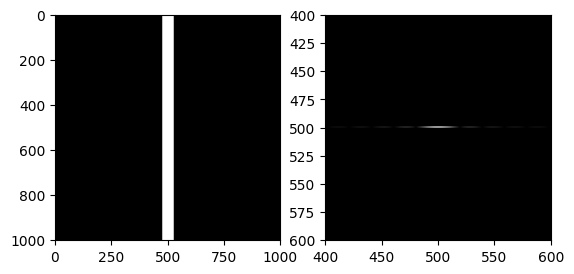

In [24]:
a = 50 

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

grating = np.zeros_like(X)
mask = (np.abs(X) <= a / 2)
grating[mask] = 1

plt.subplot(121)
plt.set_cmap("gray")
plt.imshow(grating)

ft = np.fft.fftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122) 
plt.imshow(abs(ft))
plt.xlim([400, 600]) 
plt.ylim([600, 400])

plt.show()

## 4. Réseau de fentes

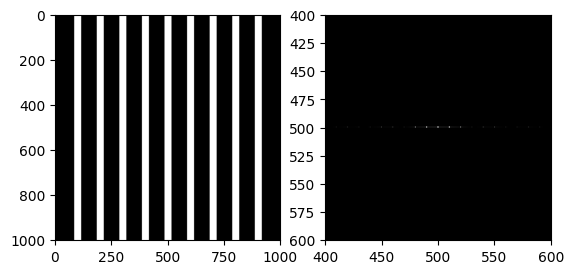

In [25]:
a = 30   
num_slits = 8 

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

grating = np.zeros_like(X)

for i in range(-num_slits // 2, num_slits // 2 + 1):
    x_offset = i * 100
    mask = (np.abs(X - x_offset) <= a / 2)
    grating[mask] = 1

plt.subplot(121)
plt.set_cmap("gray")
plt.imshow(grating)

ft = np.fft.fftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122) 
plt.imshow(abs(ft))
plt.xlim([400, 600]) 
plt.ylim([600, 400])

plt.show()

## 5. Trellis

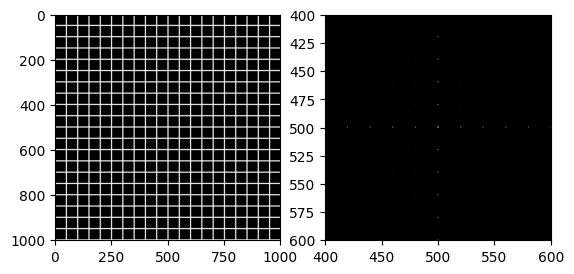

In [39]:
a = 5    
num_slits = 20 

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

grating = np.zeros_like(X)

for i in range(-num_slits // 2, num_slits // 2 + 1):
    x_offset = i * 50
    mask = (np.abs(X - x_offset) <= a / 2)
    grating[mask] = 1
for i in range(-num_slits // 2, num_slits // 2 + 1):
    y_offset = i * 50
    mask = (np.abs(Y - y_offset) <= a / 2)
    grating[mask] = 1

plt.subplot(121)
plt.set_cmap("gray")
plt.imshow(grating)

ft = np.fft.fftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122) 
plt.imshow(abs(ft))
plt.xlim([400, 600]) 
plt.ylim([600, 400])

plt.show()

## 6. Tâche Circulaire

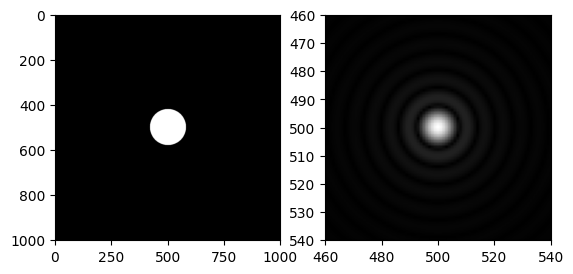

In [40]:
radius = 80
center = (0, 0)

grating = np.zeros_like(X)

circle_mask = (X - center[0]) ** 2 + (Y - center[1]) ** 2 <= radius ** 2
grating[circle_mask] = 1

plt.subplot(121)
plt.set_cmap("gray")
plt.imshow(grating)

ft = np.fft.fftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122) 
plt.imshow(abs(ft))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

plt.show()

## 7. Tâche circulaire + Trellis

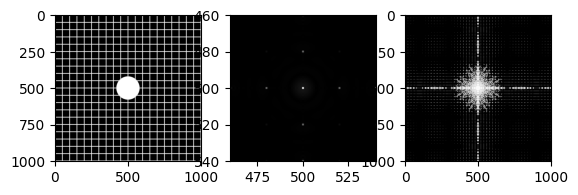

In [44]:
for i in range(-num_slits // 2, num_slits // 2 + 1):
    x_offset = i * 50
    mask = (np.abs(X - x_offset) <= a / 2)
    grating[mask] = 1
for i in range(-num_slits // 2, num_slits // 2 + 1):
    y_offset = i * 50
    mask = (np.abs(Y - y_offset) <= a / 2)
    grating[mask] = 1

plt.subplot(131)
plt.set_cmap("gray")
plt.imshow(grating)

ft = np.fft.fftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(132) 
plt.imshow(abs(ft))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

threshold = 70
thresholded_ft = np.where(abs(ft) < threshold, 0, 1)

plt.subplot(133)
plt.imshow(thresholded_ft, cmap='gray')

plt.show()

## 8. Filtrage (Tâche circulaire + Trellis)

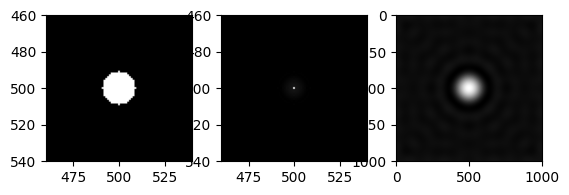

In [46]:
radius = 9
center = (0, 0)

filter_PB = np.zeros_like(X)
circle_mask = (X - center[0]) ** 2 + (Y - center[1]) ** 2 <= radius ** 2
filter_PB[circle_mask] = 1

plt.subplot(131)
plt.set_cmap("gray")
plt.imshow(filter_PB)
plt.xlim([460, 540]) 
plt.ylim([540, 460]) 

plt.subplot(132)
plt.set_cmap("gray")
plt.imshow(abs(ft * filter_PB))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

plt.subplot(133)
ift = np.fft.ifftshift(ft * filter_PB)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)

plt.show()

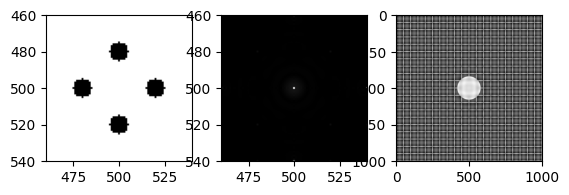

In [47]:
radius = 5
center = [(-20, 0), (20, 0), (0, -20), (0, 20)]

filter_PB = np.ones_like(X)
circle_mask = np.zeros_like(X)
for i in range(len(center)):
    circle_mask += (X - center[i][0]) ** 2 + (Y - center[i][1]) ** 2 <= radius ** 2
filter_PB[circle_mask > 0] = 0

plt.subplot(131)
plt.set_cmap("gray")
plt.imshow(abs(filter_PB))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

plt.subplot(132)
plt.set_cmap("gray")
plt.imshow(abs(ft * filter_PB))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

plt.subplot(133)
ift = np.fft.ifftshift(ft * filter_PB)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)

plt.show()

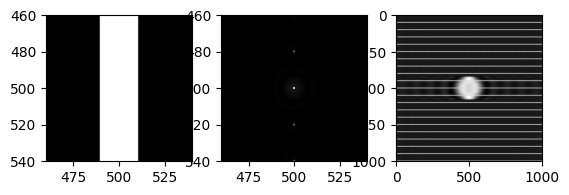

In [32]:
a = 21

filter_PB = np.zeros_like(X)
mask = (np.abs(X) <= a / 2)
filter_PB[mask] = 1

plt.subplot(131)
plt.set_cmap("gray")
plt.imshow(abs(filter_PB))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

plt.subplot(132)
plt.set_cmap("gray")
plt.imshow(abs(ft * filter_PB))
plt.xlim([460, 540]) 
plt.ylim([540, 460])

plt.subplot(133)
ift = np.fft.ifftshift(ft * filter_PB)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)

plt.show()

## 9. Détramage

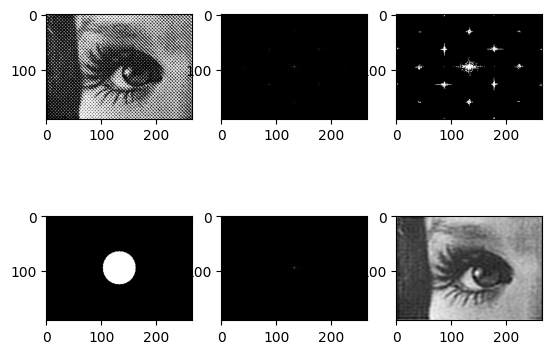

In [50]:
image_filename = "image_tramee.jpg"
image = plt.imread(image_filename)

height, width, _ = image.shape
center_x = width // 2
center_y = height // 2

image_gray = image[:, :, :3].mean(axis=2) / 255

plt.subplot(231)
plt.imshow(image)

ft = np.fft.fftshift(image_gray)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(232)
plt.imshow(np.abs(ft))

radius = 30
center = [(center_x, center_y)]

X, Y = np.meshgrid(np.arange(width), np.arange(height))
filter_PB = np.zeros([height, width])
circle_mask = np.zeros([height, width])
for i in range(len(center)):
    circle_mask += (X - center[i][0]) ** 2 + (Y - center[i][1]) ** 2 <= radius ** 2
filter_PB[circle_mask > 0] = 1

threshold = 150
thresholded_ft = np.where(abs(ft) < threshold, 0, 1)

plt.subplot(233)
plt.imshow(thresholded_ft, cmap='gray')

plt.subplot(234)
plt.set_cmap("gray")
plt.imshow(filter_PB)

plt.subplot(235)
plt.set_cmap("gray")
plt.imshow(abs(ft * filter_PB))

plt.subplot(236)
ift = np.fft.ifftshift(ft * filter_PB)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)

plt.show()

## 10. La Terre

(301, 301, 4)


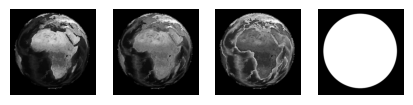

In [52]:
image_filename = "Earth.png"

# Read and process image. It's [X, Y, RGB, mask]. Separate its RGB components.
image = plt.imread(image_filename)
print(image.shape)
for k in range(image.shape[2]):
    plt.subplot(100 + (image.shape[2] + 1) * 10 + k + 1)
    plt.imshow(image[:, :, k])
    plt.axis("off")
plt.show()

(301, 301)


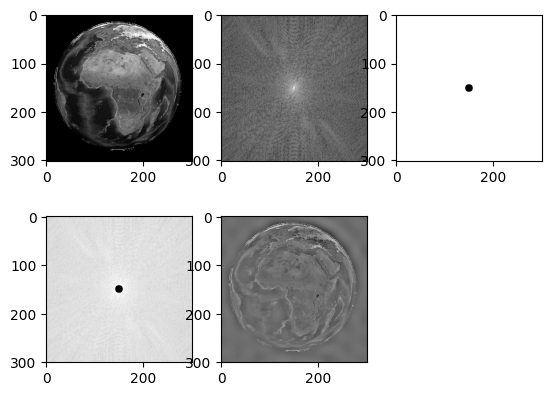

In [93]:
image_gray = image[:, :, :3].mean(axis=2) 
print(image_gray.shape)

ft = np.fft.fftshift(image_gray)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(231)
plt.imshow(image_gray)

plt.subplot(232)
plt.imshow(np.log(abs(ft)))

height, width, _ = image.shape
center_x = width // 2
center_y = height // 2
radius = 8
center = [(center_x, center_y)]

X, Y = np.meshgrid(np.arange(width), np.arange(height))
filter_PH = np.ones([height, width])
circle_mask = np.zeros([height, width])
for i in range(len(center)):
    circle_mask += (X - center[i][0]) ** 2 + (Y - center[i][1]) ** 2 <= radius ** 2
filter_PH[circle_mask > 0] = 0

plt.subplot(233)
plt.imshow(filter_PH)

plt.subplot(234)
epsilon = 1e-10
plt.imshow(np.log(abs(ft * filter_PH + epsilon)))

plt.subplot(235)
ift = np.fft.ifftshift(ft * filter_PH)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)

plt.show()

## 11. Filtre de Sobel pour la détection de Contours.

In [95]:
from scipy.ndimage import convolve

(301, 301)


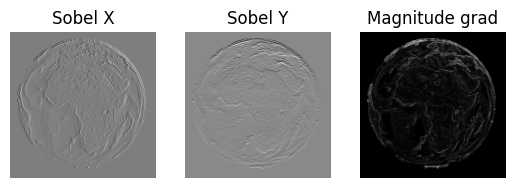

In [100]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
image_sobel_x = convolve(image_gray, sobel_x)

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
image_sobel_y = convolve(image_gray, sobel_y)

gradient_magnitude = np.sqrt(image_sobel_x**2 + image_sobel_y**2)
print(gradient_magnitude.shape)

plt.subplot(131)
plt.imshow(image_sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(132)
plt.imshow(image_sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

plt.subplot(133)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Magnitude grad')
plt.axis("off")

plt.show()

## 12. Uranus

In [200]:
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion, binary_dilation
from skimage.measure import label, regionprops
from skimage.color import label2rgb

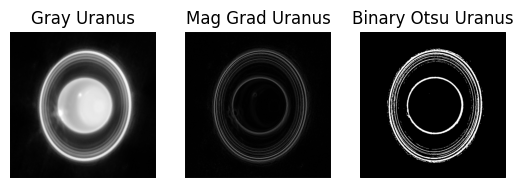

In [117]:
image_filename = "uranus-jwst-nasa.png"

image = plt.imread(image_filename)
image_gray = image[:, :, :3].mean(axis=2)

plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray Uranus')
plt.axis("off")

image_sobel_x = convolve(image_gray, sobel_x)
image_sobel_y = convolve(image_gray, sobel_y)
gradient_magnitude = np.sqrt(image_sobel_x**2 + image_sobel_y**2)

plt.subplot(132)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Mag Grad Uranus')
plt.axis("off")

threshold_value = threshold_otsu(gradient_magnitude)
binary_image = gradient_magnitude > threshold_value

plt.subplot(133)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Otsu Uranus')
plt.axis("off")

plt.show()

55


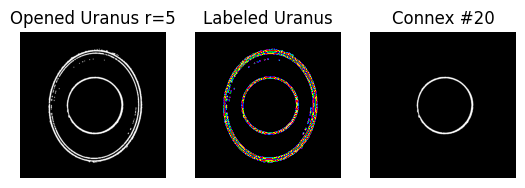

In [230]:
radius = 5
struct = np.ones((radius,radius))
opened_image = binary_dilation(binary_erosion(binary_image, struct), struct)

plt.subplot(131)
plt.imshow(opened_image, cmap='gray')
plt.title(f"Opened Uranus r={radius}")
plt.axis("off")

plt.subplot(132)
labeled_image, num_labels = label(opened_image, connectivity=2, return_num=True)
plt.imshow(opened_image, cmap='nipy_spectral')
plt.title('Labeled Uranus')
plt.axis("off")
print(num_labels)

label_number = 20
selected_component = (labeled_image == label_number)

plt.subplot(133)
plt.imshow(selected_component, cmap='gray')
plt.title(f'Connex #{label_number}')
plt.axis("off")

plt.show()

Diameter of Uranus in pixels	=	382			pixels
Real Distance -> 1 pixel	=	132.7853403141361	km


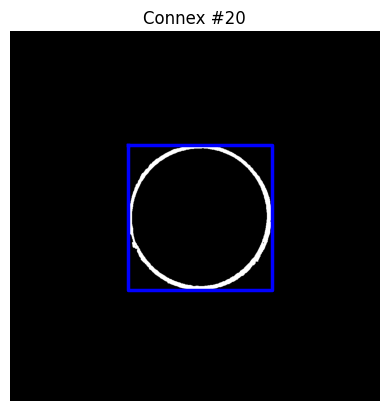

In [242]:
properties = regionprops(selected_component.astype(int))

minr, minc, maxr, maxc = properties[0].bbox
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
plt.plot(bx, by, '-b', linewidth=2.5)
plt.imshow(selected_component, cmap='gray')
plt.title(f'Connex #{label_number}')
plt.axis("off")

pixels_uranus = maxc-minc
URANUS_RADIUS = 25362000
real_distance = 2*URANUS_RADIUS/pixels_uranus

#If pixel is a suqare 
print(f"Diameter of Uranus in pixels\t=\t{pixels_uranus}\t\t\tpixels\nReal Distance -> 1 pixel\t=\t{real_distance/1000}\tkm")

plt.show()

In [436]:
DISTANCE_EARTH_URANUS = 2.723e+09

real_angle = np.arctan(real_distance/DISTANCE_EARTH_URANUS)
real_angle = real_angle * (3600 * 180)/np.pi

print(f"Real Angle -> 1 pixel\t=\t{real_angle}\t\tarcsec")

Real Angle -> 1 pixel	=	10.058370352787398		arcsec


## 14. Représenter des Téléscopes

In [328]:
num_points = 5
radius = 2

random_x = np.random.randint(0, width, num_points)
random_y = np.random.randint(0, height, num_points)

width, height = 500, 500

image = np.zeros((height, width))
for i in range(num_points):
    image += (X - random_x[i]) ** 2 + (Y - random_y[i]) ** 2 <= radius ** 2
# image[random_y, random_x] = 1

x = np.arange(0, width, 1)
y = np.arange(0, height, 1)
X, Y = np.meshgrid(x, y) 

### 14.1 Téléscope circulaire

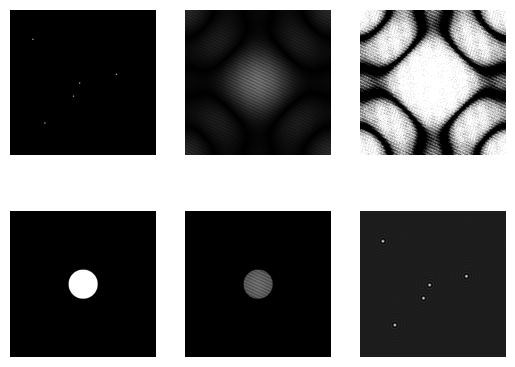

In [329]:
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.axis("off")

ft = np.fft.fftshift(image)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(232) 
plt.imshow(abs(ft))
plt.axis("off")

threshold = 2
thresholded_ft = np.where(abs(ft) < threshold, 0, 1)

plt.subplot(233)
plt.imshow(thresholded_ft, cmap='gray')
plt.axis("off")
height, width = image.shape

radius_telescope = 50
center = (width // 2, height // 2)
grating = np.zeros_like(image)
circle_mask = (X - center[0]) ** 2 + (Y - center[1]) ** 2 <= radius_telescope ** 2
grating[circle_mask] = 1

plt.subplot(234)
plt.imshow(grating, cmap='gray')
plt.axis("off")

plt.subplot(235)
ft_plus_grating = grating * ft
plt.imshow(abs(ft_plus_grating), cmap='gray')
plt.axis("off")

plt.subplot(236)
ift = np.fft.ifftshift(ft_plus_grating)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)
plt.axis("off")

plt.show()

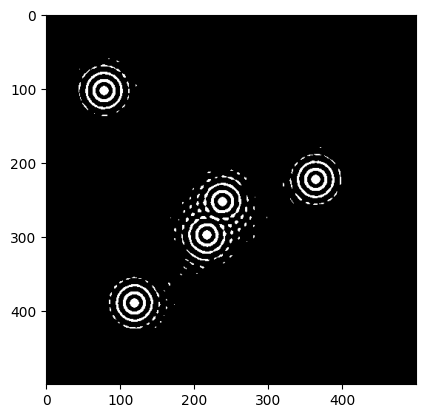

In [330]:
threshold = 0.005
thresholded_ift = np.where(ift < threshold, 0, 1)

plt.imshow(thresholded_ift)
plt.show()

### 14.2 Téléscope carré

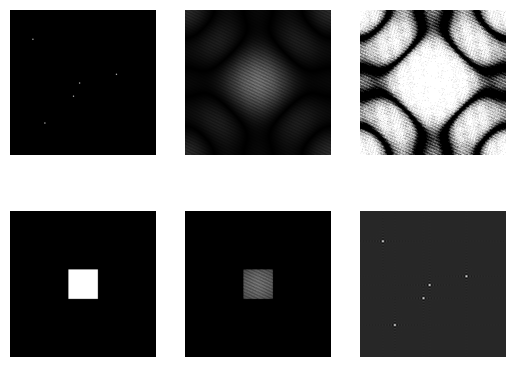

In [336]:
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.axis("off")

ft = np.fft.fftshift(image)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(232) 
plt.imshow(abs(ft))
plt.axis("off")

threshold = 2
thresholded_ft = np.where(abs(ft) < threshold, 0, 1)

plt.subplot(233)
plt.imshow(thresholded_ft, cmap='gray')
plt.axis("off")
height, width = image.shape

edge_square_telescope = 100
center = (width // 2, height // 2)
grating = np.zeros_like(image)
mask = (np.abs(X - center[0]) <= edge_square_telescope / 2) & (np.abs(Y - center[1]) <= edge_square_telescope / 2)
grating[mask] = 1

plt.subplot(234)
plt.imshow(grating, cmap='gray')
plt.axis("off")

plt.subplot(235)
ft_plus_grating = grating * ft
plt.imshow(abs(ft_plus_grating), cmap='gray')
plt.axis("off")

plt.subplot(236)
ift = np.fft.ifftshift(ft_plus_grating)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)
plt.axis("off")

plt.show()

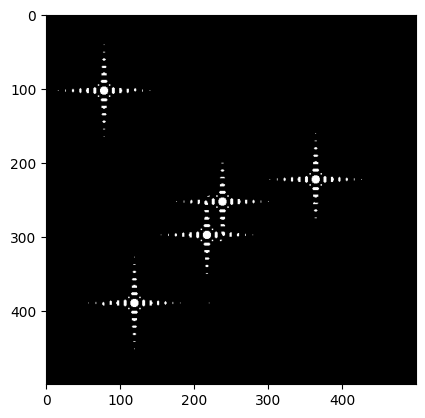

In [332]:
threshold = 0.01
thresholded_ift = np.where(ift < threshold, 0, 1)

plt.imshow(thresholded_ift)
plt.show()

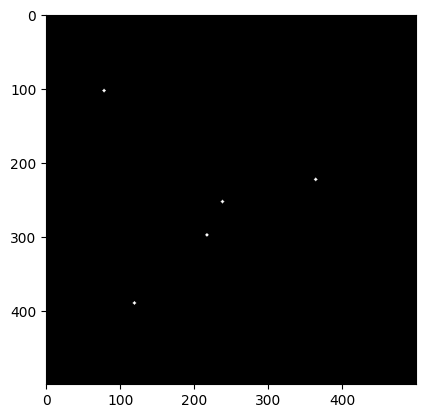

In [478]:
plt.imshow(image)
plt.show()

### 14.3 Téléscope hexagonal

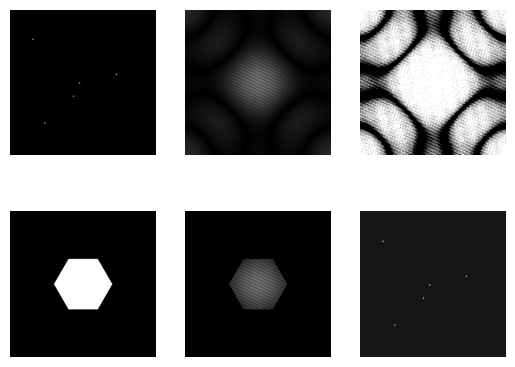

In [431]:
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.axis("off")

ft = np.fft.fftshift(image)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(232) 
plt.imshow(abs(ft))
plt.axis("off")

threshold = 2
thresholded_ft = np.where(abs(ft) < threshold, 0, 1)

plt.subplot(233)
plt.imshow(thresholded_ft, cmap='gray')
plt.axis("off")
height, width = image.shape

#######################################

radius_hexagon = 50

grating = np.zeros_like(image)
Ynew = Y - center[1]
Xnew = X - center[0]
mask = (np.abs(Xnew) <= radius_hexagon) & (np.abs(Ynew) <= np.sqrt(3)*radius_hexagon)
mask += (np.abs(Xnew - radius_hexagon) <= (radius_hexagon-np.abs(Ynew)/np.sqrt(3))) & (X >= center[0] + radius_hexagon)
mask += (np.abs(Xnew + radius_hexagon) <= (radius_hexagon-np.abs(Ynew)/np.sqrt(3))) & (X <= center[0] - radius_hexagon)
grating[mask] = 1

#######################################

plt.subplot(234)
plt.imshow(grating, cmap='gray')
plt.axis("off")

plt.subplot(235)
ft_plus_grating = grating * ft
plt.imshow(abs(ft_plus_grating), cmap='gray')
plt.axis("off")

plt.subplot(236)
ift = np.fft.ifftshift(ft_plus_grating)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)
plt.axis("off")

plt.show()

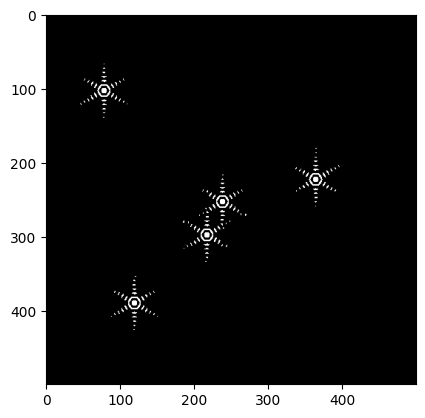

In [432]:
threshold = 0.01
thresholded_ift = np.where(ift < threshold, 0, 1)

plt.imshow(thresholded_ift)
plt.show()

### 14.4 James Webb Telescope (1)

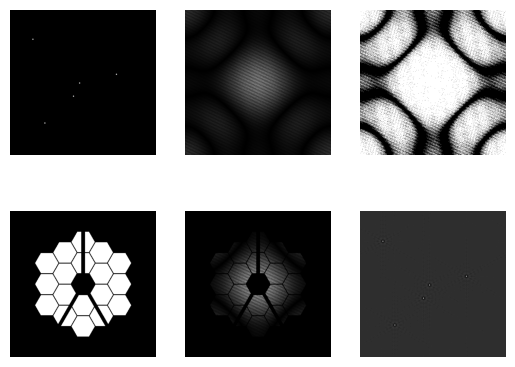

In [540]:
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.axis("off")

ft = np.fft.fftshift(image)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(232) 
plt.imshow(abs(ft))
plt.axis("off")

threshold = 2
thresholded_ft = np.where(abs(ft) < threshold, 0, 1)

plt.subplot(233)
plt.imshow(thresholded_ft, cmap='gray')
plt.axis("off")
height, width = image.shape

#######################################

radius_hexagon = 20
D1_JWST = 2*np.sqrt(3)*radius_hexagon + 3
D2_JWST = 2*np.sqrt(3)*radius_hexagon - 7

height, width = image.shape
center_x = width // 2
center_y = height // 2

centers = [(center_x, D1_JWST * (i + 1) + center_y) for i in range(2)]
centers.extend([(center_x, -D1_JWST * (i + 1) + center_y) for i in range(2)])
centers.extend([(D2_JWST + center_x, D1_JWST * (i - 1.5) + center_y) for i in range(4)])
centers.extend([(-D2_JWST + center_x, D1_JWST * (i - 1.5) + center_y) for i in range(4)])
centers.extend([(-2*D2_JWST + center_x, D1_JWST * (i - 1) + center_y) for i in range(3)])
centers.extend([(2*D2_JWST + center_x, D1_JWST * (i - 1) + center_y) for i in range(3)])


grating = np.zeros_like(image)
mask = np.zeros_like(image)
for c in centers:
    Ynew = Y - c[1]
    Xnew = X - c[0]
    mask += (np.abs(Xnew) <= radius_hexagon) & (np.abs(Ynew) <= np.sqrt(3)*radius_hexagon)
    mask += (np.abs(Xnew - radius_hexagon) <= (radius_hexagon-np.abs(Ynew)/np.sqrt(3))) & (X >= c[0] + radius_hexagon)
    mask += (np.abs(Xnew + radius_hexagon) <= (radius_hexagon-np.abs(Ynew)/np.sqrt(3))) & (X <= c[0] - radius_hexagon)

mask2 = np.zeros_like(image)    
mask2 += (np.abs(X - center_x) <= 6) & (Y <= 250) & (Y >= 50)
mask2 += (Y >= center_y) & (np.sqrt(3)*(X - center_y) > Y - center_y - 12) & (np.sqrt(3)*(X - center_y) < Y - center_y + 12)
mask2 += (Y >= center_y) & (np.sqrt(3)*(- X + center_y) >= Y - center_y - 12) & (np.sqrt(3)*(- X + center_y) < Y - center_y + 12)

grating[mask > 0] = 1
grating[mask2 > 0] = 0


#######################################

plt.subplot(234)
plt.imshow(grating, cmap='gray')
plt.axis("off")

plt.subplot(235)
ft_plus_grating = grating * ft
plt.imshow(abs(ft_plus_grating), cmap='gray')
plt.axis("off")

plt.subplot(236)
ift = np.fft.ifftshift(ft_plus_grating)
ift = np.fft.ifft2(ift)
ift = np.fft.ifftshift(ift)
ift = ift.real
plt.imshow(ift)
plt.axis("off")

plt.show()

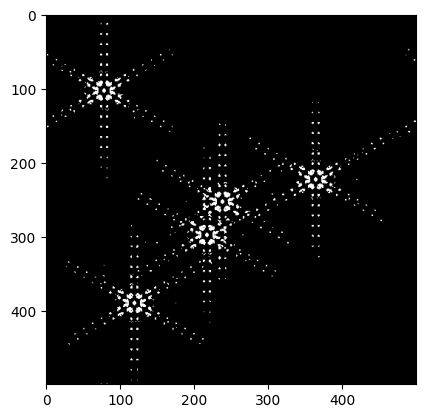

In [541]:
threshold = 0.01
thresholded_ift = np.where(ift < threshold, 0, 1)

plt.imshow(thresholded_ift)
plt.show()